# Desafío - Expansiones basales
____

Nombre: __Hugo Zúñiga__

Profesor: Josué Fredes

Generación: __G4__

____

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad. 
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv). 
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.
____

## Descripción

* Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos. 
* Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.
* Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

___

## Ejercicio 1: Preparar el ambiente de trabajo

* Importe los módulos clásicos del trabajo en ciencia de datos.
* El archivo tiene el nombre `compresive_strength_concrete.csv`. Impórtelo y genere estadísticas descriptivas.
* En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería `pyGAM`.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

from pygam import LinearGAM
from pygam.utils import generate_X_grid

import warnings
warnings.filterwarnings(action='ignore')

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 80 
sn.set_style('darkgrid')

In [2]:
df = pd.read_csv('compresive_strength_concrete.csv')
df.sample(10)

Cement (component 1)(kg in a m^3 mixture)  \
807                                       382.0   
170                                       388.6   
655                                       166.8   
863                                       288.0   
1027                                      148.5   
387                                       520.0   
478                                       446.0   
833                                       152.0   
723                                       310.0   
390                                       450.1   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
807                                                 0.0       
170                                                97.1       
655                                               250.2       
863                                               121.0       
1027                                              139.4       
387                                                 0.0       
478                                                24.0       
833                                               178.0       
723                                                 0.0       
390                                                50.0       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
807                                          0.0   
170                                          0.0   
655                                          0.0   
863                                          0.0   
1027                                       108.6   
387                                          0.0   
478                                         79.0   
833                                        139.0   
723                                          0.0   
390                                          0.0   

      Water  (component 4)(kg in a m^3 mixture)  \
807                                       185.0   
170                                       157.9   
655                                       203.5   
863                                       177.0   
1027                                      192.7   
387                                       175.0   
478                                       162.0   
833                                       168.0   
723                                       192.0   
390                                       200.0   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
807                                                 0.0     
170                                                12.1     
655                                                 0.0     
863                                                 7.0     
1027                                                6.1     
387                                                 5.2     
478                                                11.6     
833                                                18.0     
723                                                 0.0     
390                                                 3.0     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
807                                              1047.0      
170                                               852.1      
655                                               975.6      
863                                               908.0      
1027                                              892.4      
387                                               870.0      
478                                               967.0      
833                                               944.0      
723                                              1012.0      
390                                              1124.4      

      Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
807                                               739.0         28   
170                                               925.7         91   
655                                               

In [3]:
df.describe()

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.167864   
std                                   104.506364   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895825       
std                                            86.279342       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.188350   
std                                     63.997004   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.300000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.567282   
std                                    21.354219   
min                                   121.800000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.204660     
std                                             5.973841     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.400000     
75%                                            10.200000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918932      
std                                            77.753954      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.580485    45.662136   
std                                            80.175980    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.500000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817961  
std                                           16.705742

## Ejercicio 2: Descripción

* El vector objetivo tiene el nombre de `Concrete compressive strength(MPa, megapascals)`.
* Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice `iloc`.
* Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decida si es necesario normalizarlos/escalarlos.

In [4]:
# renombro las columnas
df.columns = ['Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer ','Coarse_Aggregate','Fine_Aggregate ','Age','Concrete_compressive_strength']
df.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer ',
       'Coarse_Aggregate', 'Fine_Aggregate ', 'Age',
       'Concrete_compressive_strength'],
      dtype='object')

In [5]:
# Reviso el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                           1030 non-null float64
Blast_Furnace_Slag               1030 non-null float64
Fly_Ash                          1030 non-null float64
Water                            1030 non-null float64
Superplasticizer                 1030 non-null float64
Coarse_Aggregate                 1030 non-null float64
Fine_Aggregate                   1030 non-null float64
Age                              1030 non-null int64
Concrete_compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


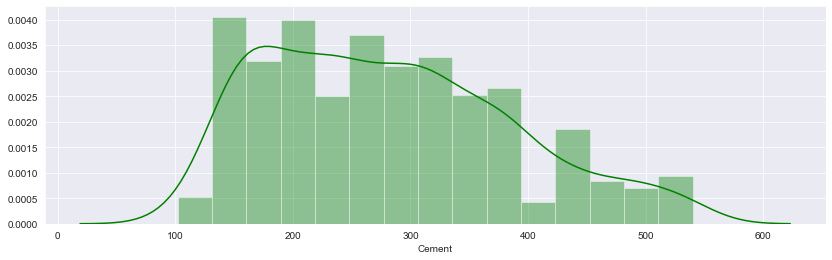

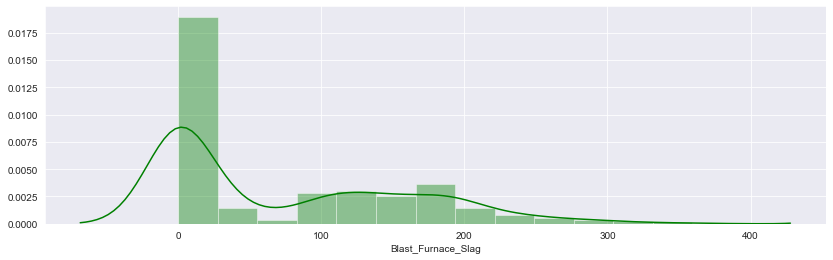

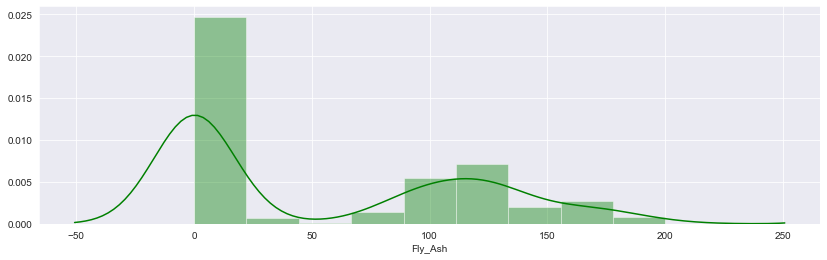

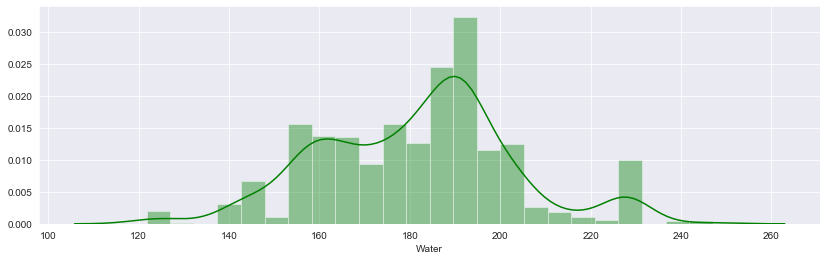

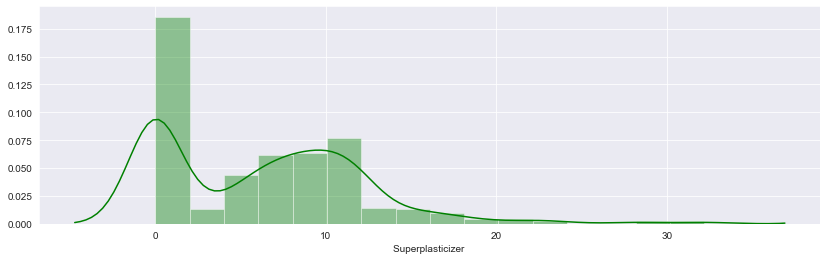

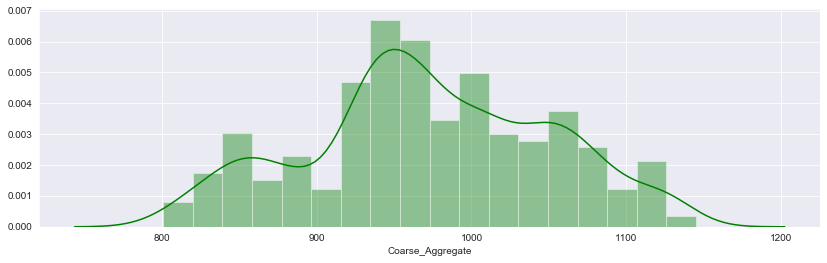

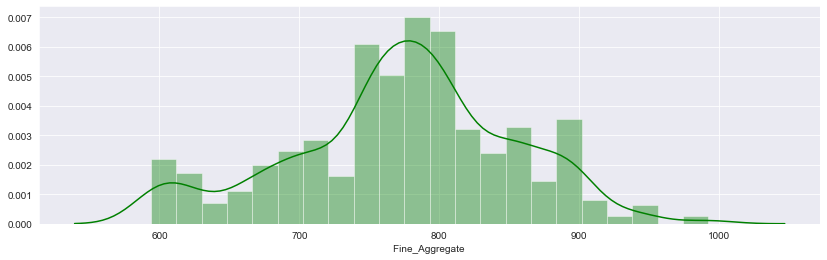

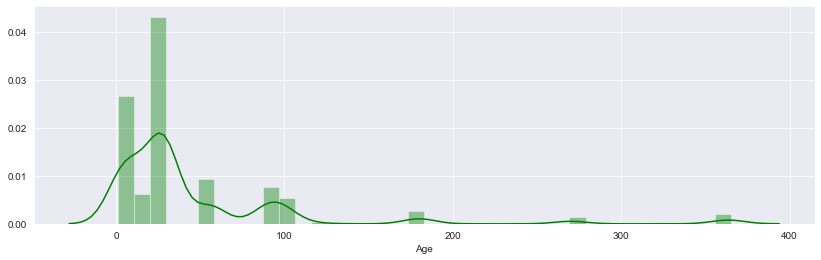

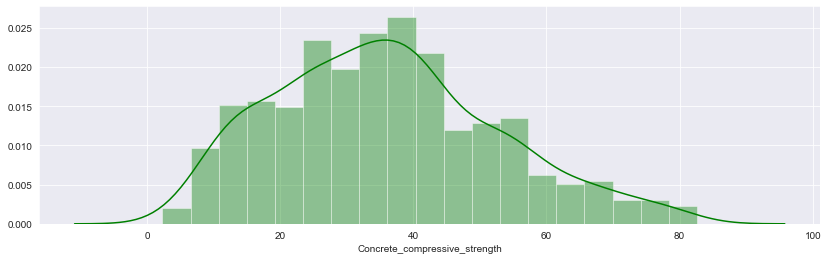

In [45]:
# Reviso las distribuciones
for i in df.columns:
    plt.figure()
    sns.distplot(df[i], label=i, color='g')

In [7]:
# Escalamos
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

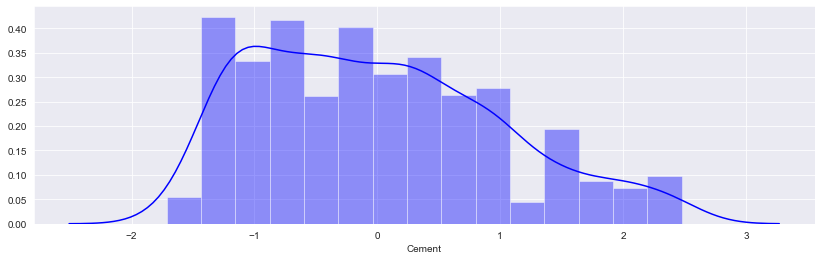

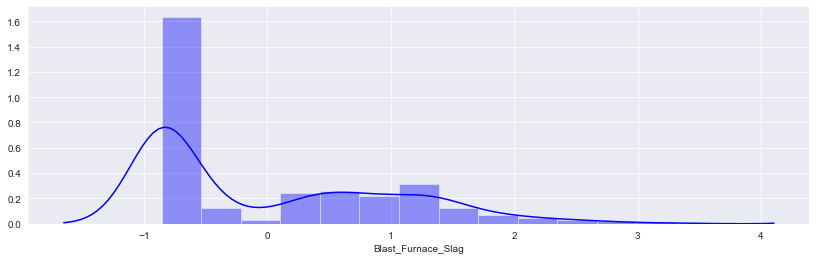

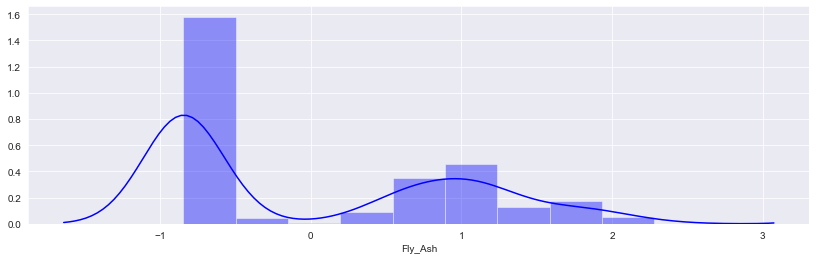

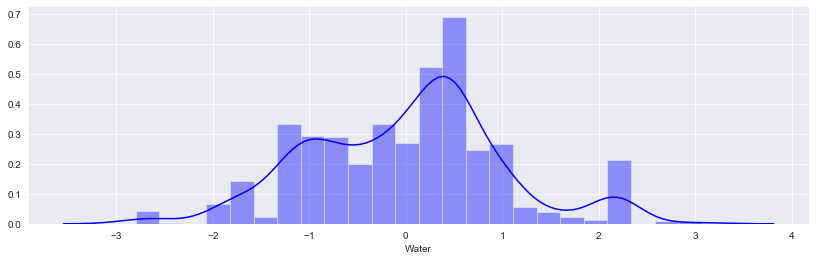

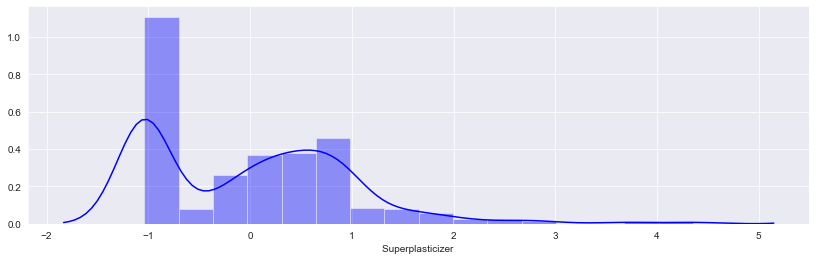

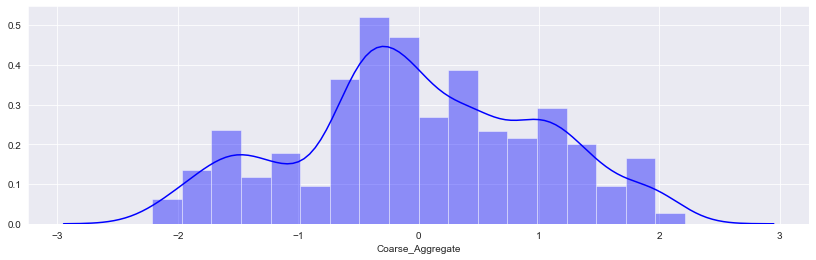

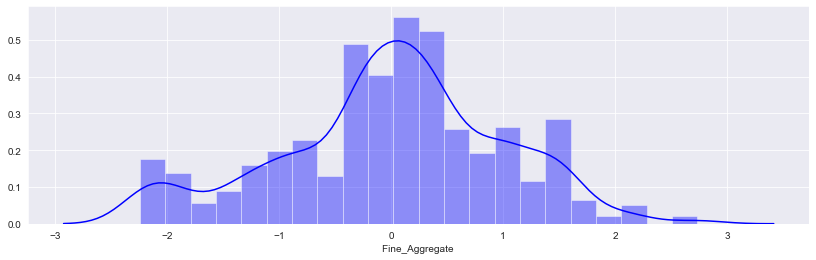

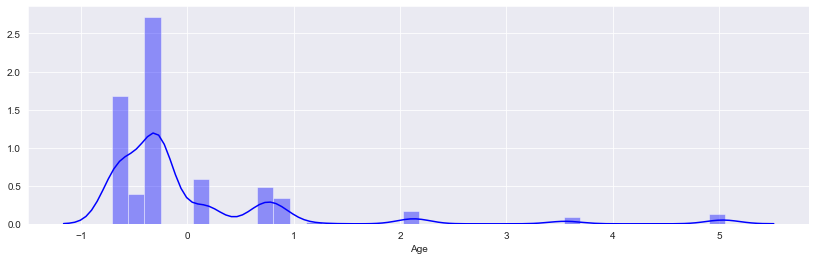

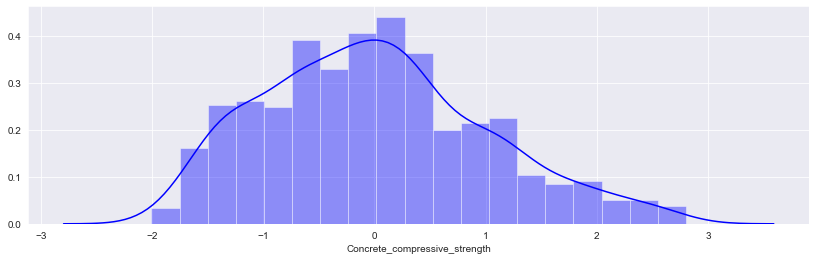

In [46]:
# Reviso las distribuciones
for i in df_scaled.columns:
    plt.figure()
    sns.distplot(df_scaled[i], label=i, color='b')

__Comentario:__ En este caso no quise normalizar usando logarítmo ya que encontraba valores infinitos dada la división por cero. Se optó sólamente por estandarizar.

## Ejercicio 3: Modelo

* En base al vector objetivo, decida el mejor modelo e impórtelo con `pygam`. Condicional a ésto, importe las métricas de desempeño asociadas.
* Genere conjuntos de entrenamiento y validación.
* Genere un primer modelo __sin implementar la función `gridsearch`__. Repórte el hiperparámetro `lam` así como las métricas de desempeño asociadas.
* Genere un segundo modelo implementando `gridsearch` en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiperparámetro y sus métricas de desempeño.

In [9]:
# Generamos el conjunto de entrenamiento
X = df_scaled.loc[:,'Cement':'Age']
y = df_scaled['Concrete_compressive_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1625)

In [10]:
# Genero el modelo gam1 sin la función gridsearch
gam1 = LinearGAM().fit(X_train, y_train)

In [11]:
# Genero el resumen
gam1.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     95.5144
Link Function:                     IdentityLink Log Likelihood:                                 -2463.2064
Number of Samples:                          721 AIC:                                             5119.4417
                                                AICc:                                            5149.6318
                                                GCV:                                                0.1151
                                                Scale:                                               0.088
                                                Pseudo R-Squared:                                   0.9209
Feature Function   Data Type      Num

In [12]:
# Se evaluarán los siguientes lambdas 
lambdas = np.logspace(-3, 3, 50)
lambdas

array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.12095089e-01,
       2.81176870e-01, 3.72759372e-01, 4.94171336e-01, 6.55128557e-01,
       8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])

In [13]:
# Genero modelo con gridsearch
search_params = {'lam': lambdas}
gam2 = LinearGAM().gridsearch(X_train, y_train, **search_params)
gam2.summary()

100% (50 of 50) |########################| Elapsed Time: 0:00:08 Time:  0:00:08


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    110.0517
Link Function:                     IdentityLink Log Likelihood:                                 -2542.2031
Number of Samples:                          721 AIC:                                             5306.5096
                                                AICc:                                            5347.3786
                                                GCV:                                                 0.114
                                                Scale:                                              0.0832
                                                Pseudo R-Squared:                                    0.927
Feature Function   Data Type      Num

In [14]:
# Defino función para mostrar métricas de desempeño
def report_gam_metrics(model, X_test, y_test):
    print('Lambda: {0}'.format(round(model.lam, 3)))
    print('Test R^2 accuracy: {0}'.format(r2_score(y_test, model.predict(X_test)).round(3)))
    print('Test MSE accuracy: {0}'.format(mean_squared_error(y_test, model.predict(X_test)).round(3)))
    print('Test RMSE accuracy: {0}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test))).round(3)))
    print('Test MAE accuracy: {0}'.format(median_absolute_error(y_test, model.predict(X_test)).round(3)))

In [15]:
# Primero modelo
report_gam_metrics(gam1, X_test, y_test)

Lambda: 0.6
Test R^2 accuracy: 0.903
Test MSE accuracy: 0.104
Test RMSE accuracy: 0.323
Test MAE accuracy: 0.203


In [16]:
# Segundo modelo
report_gam_metrics(gam2, X_test, y_test)

Lambda: 0.212
Test R^2 accuracy: 0.902
Test MSE accuracy: 0.106
Test RMSE accuracy: 0.326
Test MAE accuracy: 0.185


__Comentario:__ Dado que las métricas son muy similares, nos quedaremos con el segundo modelo ya que presenta una mayor diferencia en el MAE (con un valor inferior). Sin embargo se podría intentar corregir este rango considerando el desempeño del modelo por defecto.

## Ejercicio 4: Dependencia Parcial

* En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
* Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
* Reporte brevemente sobre qué atributos están asociados a mayores y menores niveles de resistencia.

In [43]:
# Generamos la función
def dep_parcial(gam):
    x_grid = generate_X_grid(gam)
    attribute = X_train.columns
    N = attribute.shape[0]
    rows = np.ceil(len(attribute) / N)
    for i, n in enumerate(range(len(attribute))):
        plt.rcParams["figure.figsize"] = (14, 4)
        plt.subplot(2, 4, i + 1)
        partial_dep, confidence_intervals = gam.partial_dependence(x_grid, feature = i + 1, width=0.95)
        plt.plot(x_grid[:, n], partial_dep, color='crimson')
        plt.fill_between(x_grid[:, n],
                         confidence_intervals[0][:, 0],
                         confidence_intervals[0][:, 1],
                         color='crimson', alpha=.25)
        plt.title(attribute[n])
        plt.plot(X_train[attribute[n]],
                 [plt.ylim()[0]] * len(X_train[attribute[n]]),'|', color='grey', alpha=.8)
    plt.tight_layout()

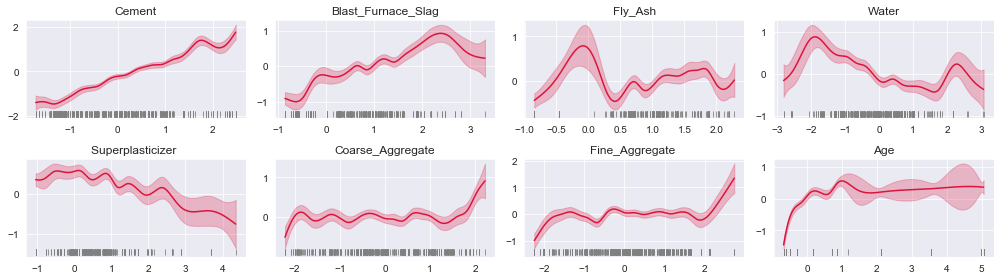

In [44]:
dep_parcial(gam2)

__Comentario:__ Podemos concluir que cada atributo influye en mayor o menor nivel de resistencia, esto es:
* `Cement` indica que aumentaría la resistencia en la medida que este aumente.
* `Blast Furnace Slag` también tendría un comportamiento casi lineal donde aumenta junto con la resistencia.
* `Fly Ash` también tiene un comportamiento que nos indica cierta tendencia a aumentar junto con la resistencia.
* `Water` nos indica que a mayor nivel tiene un efecto negativo en la resistencia.
* `Superplasticizer` indica que a mayor nivel podría decender la resistencia.
* `Coarse Aggregate` nos indica que en ciertas cantidades presenta mejor resistencia.
* `Fine Aggregate` también nos indica que en determinadas cantidades presentará mejor resistencia.
* `Age` nos indica que valores cercanos a _1_ se puede apreciar un mejor desempeño con la resistencia.